In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Общее число родившихся младенцев каждого пола
cols = ['name', 'gender', 'birth']
data = pd.read_table('yob1881.txt', sep = ',', engine = 'python', names = cols)
data['gender'].value_counts().to_frame()

,gender
M,997
F,938


In [3]:
# Добавление столбца year
cols = ['name', 'gender', 'birth']
pieces = []
years = range(1880, 2011)
for i in years:
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['year'] = i
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)
data

,name,gender,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
# Сумма родившихся младенцев по полу, для кажого года
gender = data.pivot_table('birth', index = 'year', columns = 'gender', aggfunc = 'sum')
gender

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


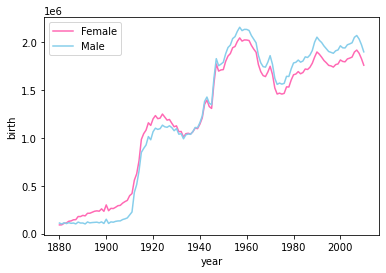

In [6]:
# График
a = gender['F']
b = gender['M']
c = years
plt.xlabel('year')
plt.ylabel('birth')
plt.plot(c, a, label = 'Female', color = 'hotpink', lw = 1.5)
plt.plot(c, b, label = 'Male', color = 'skyblue', lw = 1.5)
plt.legend()
plt.show()

In [7]:
# Добавление столбца proportion
df = pd.DataFrame(data)
df['proportion'] = df['birth'] / sum(df['birth'])
df

,name,gender,birth,year,proportion
0,Mary,F,7065,1880,2.191359e-05
1,Anna,F,2604,1880,8.076855e-06
2,Emma,F,2003,1880,6.212727e-06
3,Elizabeth,F,1939,1880,6.014217e-06
4,Minnie,F,1746,1880,5.415587e-06
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,1.550855e-08
1690780,Zyonne,M,5,2010,1.550855e-08
1690781,Zyquarius,M,5,2010,1.550855e-08
1690782,Zyran,M,5,2010,1.550855e-08


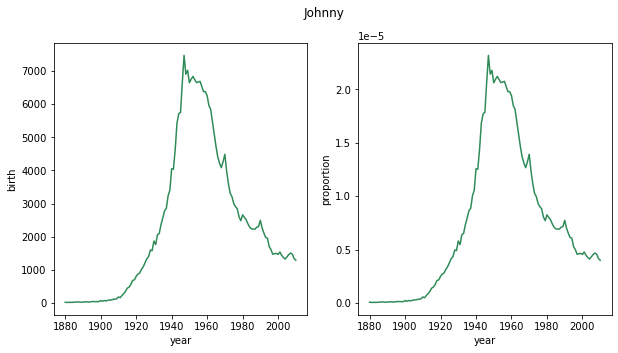

In [11]:
# Графики для общего количества и относительной доли младенцев 
name = df[df['name'] == 'Johnny']
df1 = name.pivot_table('birth', index = 'year', aggfunc = 'sum')
df2 = name.pivot_table('proportion', index = 'year', aggfunc = 'sum')
a = df1['birth']
b = df2['proportion']
c = years
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('year')
ax1.set_ylabel('birth')
ax2.set_xlabel('year')
ax2.set_ylabel('proportion')
ax1.plot(c, a, color = 'seagreen', lw = 1.5)
ax2.plot(c, b, color = 'seagreen', lw = 1.5)
plt.suptitle('Johnny')
plt.show()

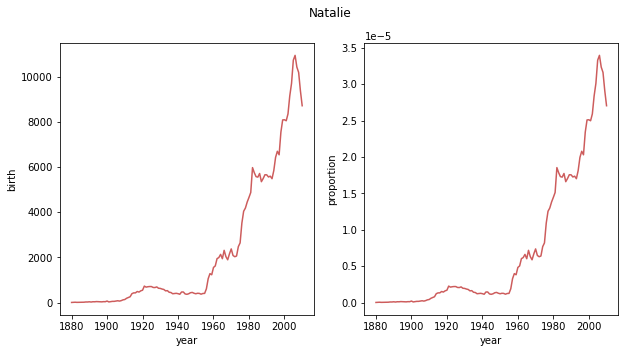

In [12]:
name = df[df['name'] == 'Natalie']
df1 = name.pivot_table('birth', index = 'year', aggfunc = 'sum')
df2 = name.pivot_table('proportion', index = 'year', aggfunc = 'sum')
a = df1['birth']
b = df2['proportion']
c = years
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('year')
ax1.set_ylabel('birth')
ax2.set_xlabel('year')
ax2.set_ylabel('proportion')
ax1.plot(c, a, color = 'indianred', lw = 1.5)
ax2.plot(c, b, color = 'indianred', lw = 1.5)
plt.suptitle('Natalie')
plt.show()

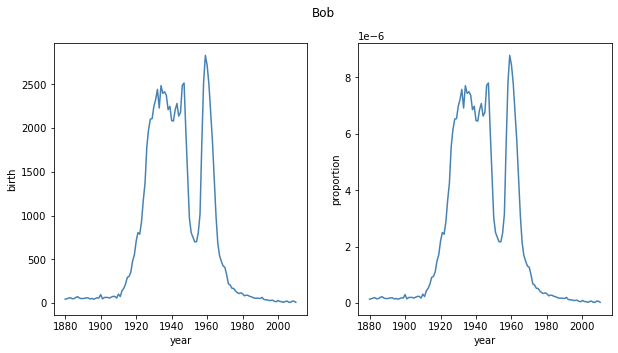

In [13]:
name = df[df['name'] == 'Bob']
df1 = name.pivot_table('birth', index = 'year', aggfunc = 'sum')
df2 = name.pivot_table('proportion', index = 'year', aggfunc = 'sum')
a = df1['birth']
b = df2['proportion']
c = years
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('year')
ax1.set_ylabel('birth')
ax2.set_xlabel('year')
ax2.set_ylabel('proportion')
ax1.plot(c, a, color = 'steelblue', lw = 1.5)
ax2.plot(c, b, color = 'steelblue', lw = 1.5)
plt.suptitle('Bob')
plt.show()

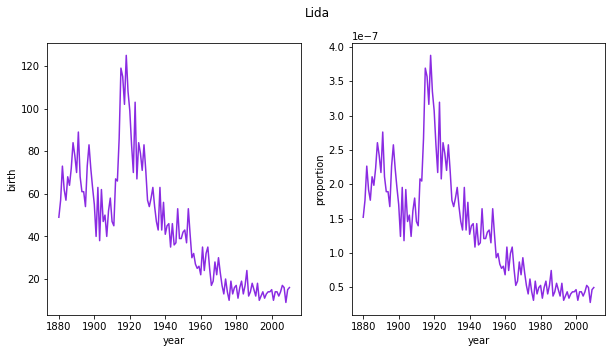

In [17]:
name = df[df['name'] == 'Lida']
df1 = name.pivot_table('birth', index = 'year', aggfunc = 'sum')
df2 = name.pivot_table('proportion', index = 'year', aggfunc = 'sum')
a = df1['birth']
b = df2['proportion']
c = years
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('year')
ax1.set_ylabel('birth')
ax2.set_xlabel('year')
ax2.set_ylabel('proportion')
ax1.plot(c, a, color = 'blueviolet', lw = 1.5)
ax2.plot(c, b, color = 'blueviolet', lw = 1.5)
plt.suptitle('Lida')
plt.show()

In [18]:
# Самые популярные имена в каждом году
cols = ['name', 'gender', 'birth']
pieces = []
years = range(1880, 2011)
for i in years:
    df = pd.read_table('yob%d.txt'%i, sep = ',', engine = 'python' , names = cols)
    df['year'] = i
    df1 = df.drop(df.index[1:df.size])
    pieces.append(df1)
    data = pd.concat(pieces, ignore_index = True)
data

,name,gender,birth,year
0,Mary,F,7065,1880
1,Mary,F,6919,1881
2,Mary,F,8149,1882
3,Mary,F,8012,1883
4,Mary,F,9217,1884
...,...,...,...,...
126,Emily,F,21365,2006
127,Emily,F,19322,2007
128,Emma,F,18765,2008
129,Isabella,F,22222,2009
